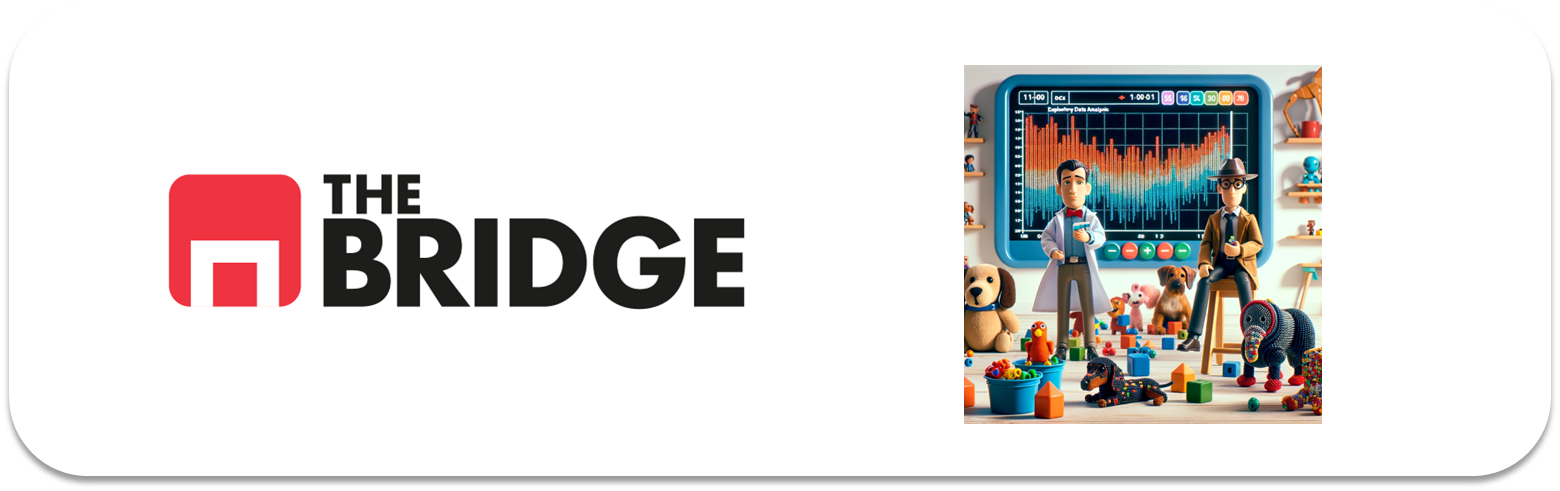

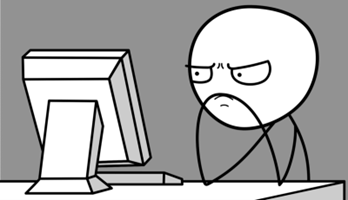

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\admission_data.csv"
# Cargar el archivo CSV en un DataFrame
df_admission = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar su contenido
print("Primeras filas del DataFrame:")
print(df_admission.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df_admission.info())

Primeras filas del DataFrame:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None


In [4]:
df_admission

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
...,...,...,...,...,...
12758,12758,1973,Other,M,Accepted
12759,12759,1973,Department of Mechanical Engineering,M,Accepted
12760,12760,1973,Other,F,Rejected
12761,12761,1973,Other,M,Rejected


In [5]:
# Lista de columnas innecesarias
columnas_innecesarias = ["Unnamed: 0"]  # Reemplaza con los nombres de las columnas que deseas eliminar

# Eliminar columnas innecesarias del DataFrame
df_admission_limpio = df_admission.drop(columns=columnas_innecesarias, errors="ignore")

# Mostrar las primeras filas del DataFrame limpio para verificar
print("Primeras filas del DataFrame limpio:")
print(df_admission_limpio.head())

# Mostrar información general del DataFrame limpio
print("\nInformación general del DataFrame limpio:")
print(df_admission_limpio.info())

Primeras filas del DataFrame limpio:
   Year                    Major Gender Admission
0  1973       School of Medicine      F  Rejected
1  1973  Department of Economics      M  Accepted
2  1973                    Other      F  Accepted
3  1973                    Other      M  Accepted
4  1973                    Other      M  Rejected

Información general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  int64 
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: int64(1), object(3)
memory usage: 399.0+ KB
None


In [6]:
df_admission_limpio

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,Department of Mechanical Engineering,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

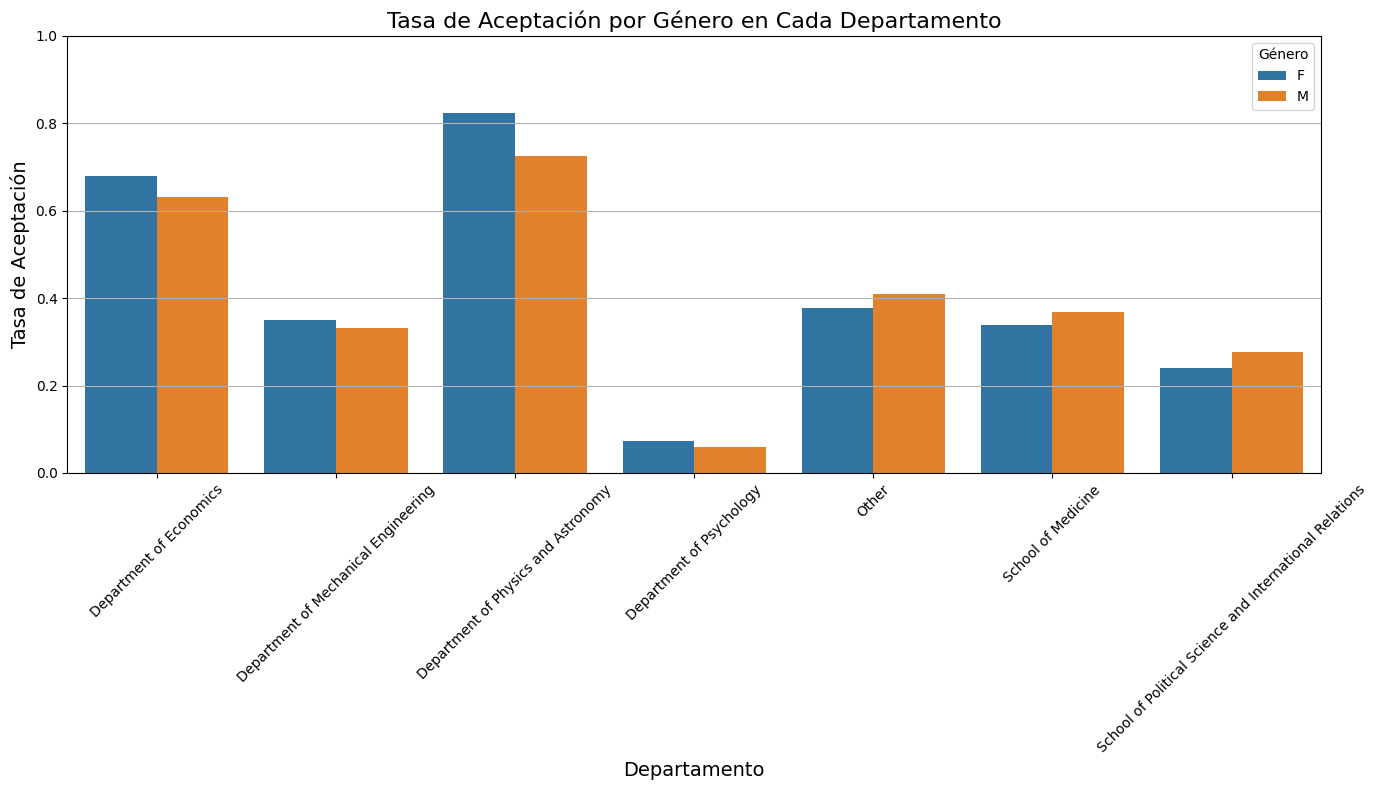

In [ ]:


# Crear una columna para determinar si la admisión fue aceptada (1) o rechazada (0)
df_admission_limpio['Admission_Binary'] = df_admission_limpio['Admission'].map({'Accepted': 1, 'Rejected': 0})

# Calcular la tasa de aceptación por género y departamento
acceptance_rate = df_admission_limpio.groupby(['Major', 'Gender'])['Admission_Binary'].mean().reset_index()

# Crear un gráfico de barras para visualizar la tasa de aceptación
plt.figure(figsize=(14, 8))
sns.barplot(x='Major', y='Admission_Binary', hue='Gender', data=acceptance_rate)
plt.title('Tasa de Aceptación por Género en Cada Departamento', fontsize=16)
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Tasa de Aceptación', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Género')
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



## Conclusión:

Aunque el gráfico sugiere que existen diferencias en las tasas de aceptación por género en ciertos departamentos, no es suficiente para afirmar que hay discriminación. 
En caso de querer ampliar el estudio  es necesario realizar estudios adicionales, como analizar criterios de admisión y otras variables relevantes, 








### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [13]:
# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\tips.csv"

# Cargar el archivo en un DataFrame
df_tips = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(df_tips.head())

# Mostrar información general del DataFrame
print("\nInformación general del dataset:")
print(df_tips.info())

   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15

In [14]:
df_tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [15]:
# Eliminar columnas innecesarias
columnas_innecesarias = ['Unnamed: 0']  # Especifica las columnas que deseas eliminar
df_tips_limpio = df_tips.drop(columns=columnas_innecesarias)

# Mostrar las primeras filas del nuevo DataFrame limpio
print(df_tips_limpio.head())

# Mostrar información general del nuevo DataFrame limpio
print("\nInformación general del DataFrame limpio:")
print(df_tips_limpio.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Información general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [16]:
df_tips_limpio

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

Matriz de correlaciones numérica:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


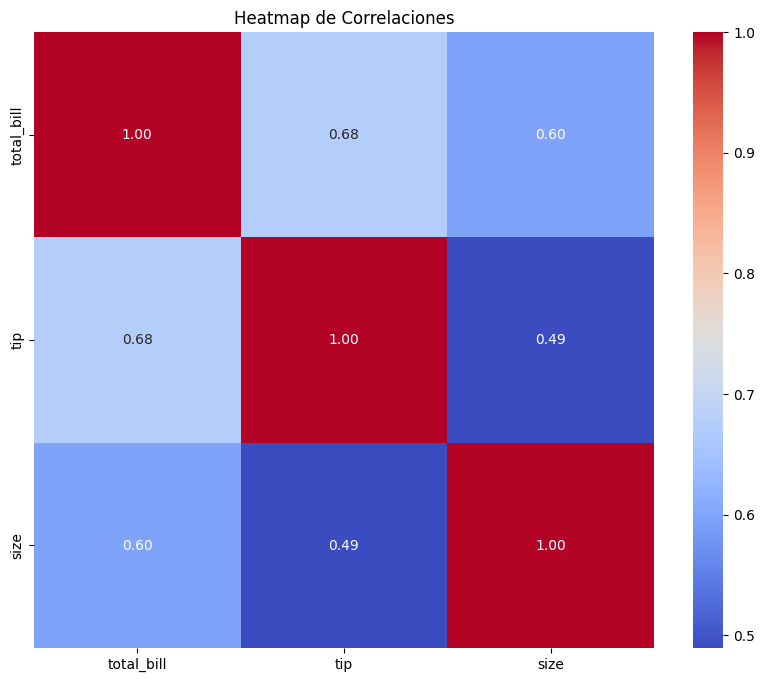

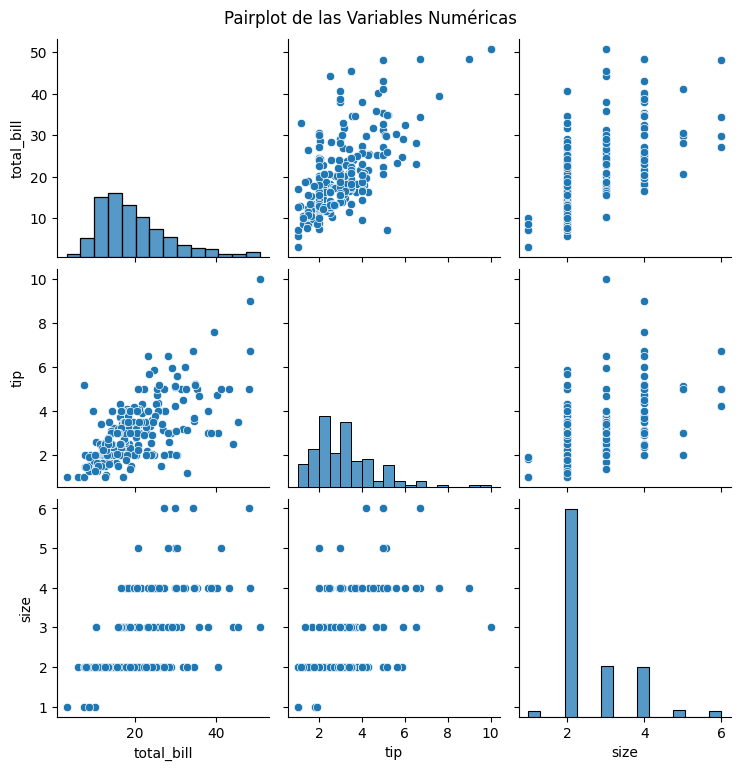

In [19]:
# Filtrar solo las columnas numéricas
df_tips_numericas = df_tips_limpio.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlaciones
correlaciones = df_tips_numericas.corr()

# Mostrar la matriz de correlaciones numérica
print("Matriz de correlaciones numérica:")
print(correlaciones)

# Crear el heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap de Correlaciones")
plt.show()

# Crear un pairplot de las variables numéricas
sns.pairplot(df_tips_numericas)
plt.suptitle("Pairplot de las Variables Numéricas", y=1.02)
plt.show()

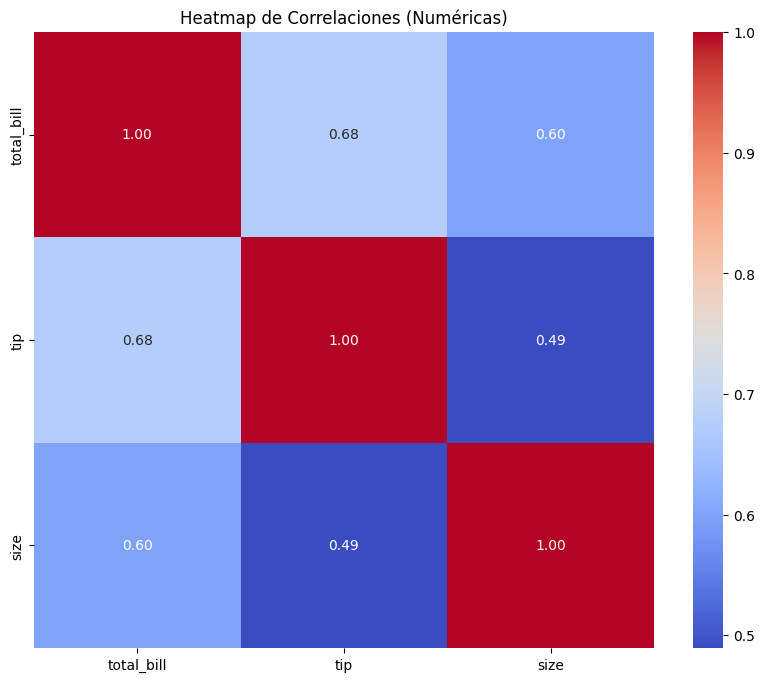

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


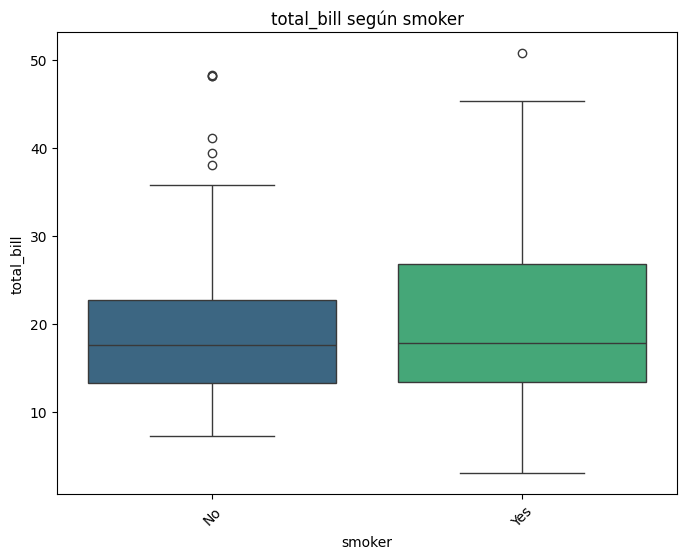

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


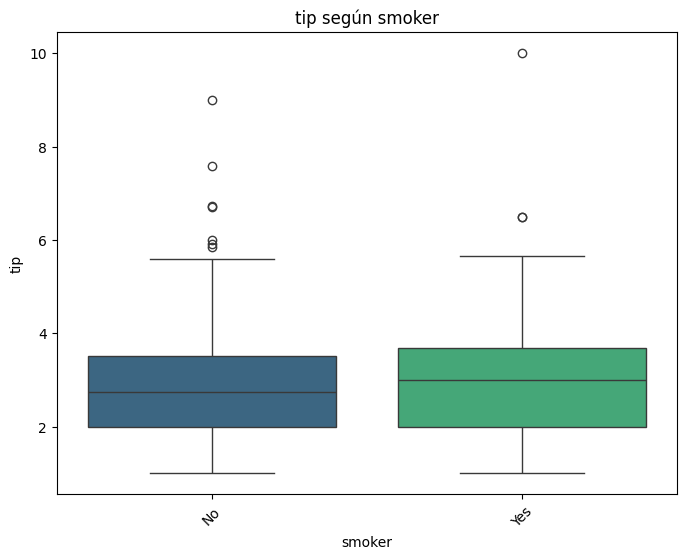

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


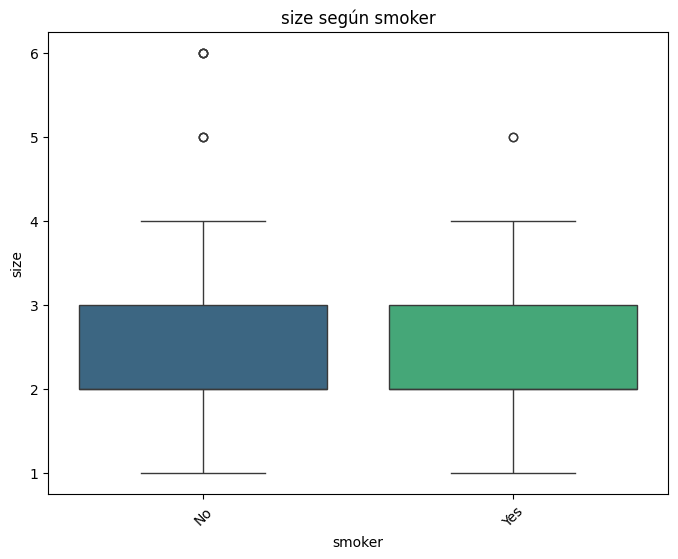

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


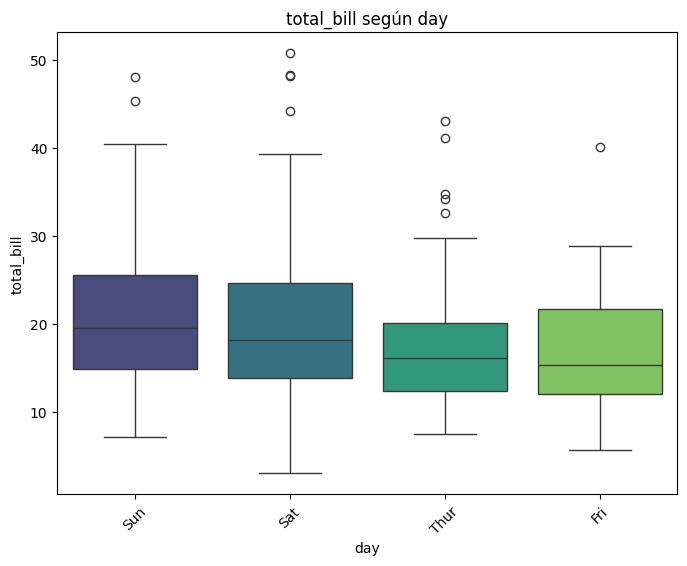

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


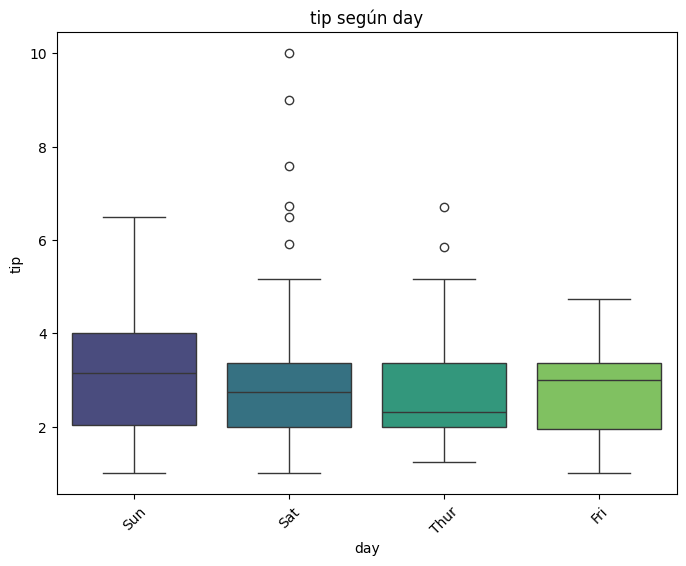

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


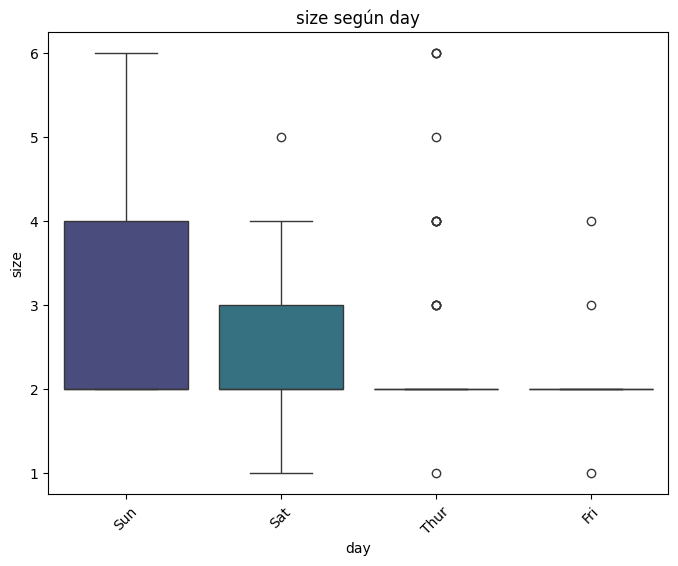

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


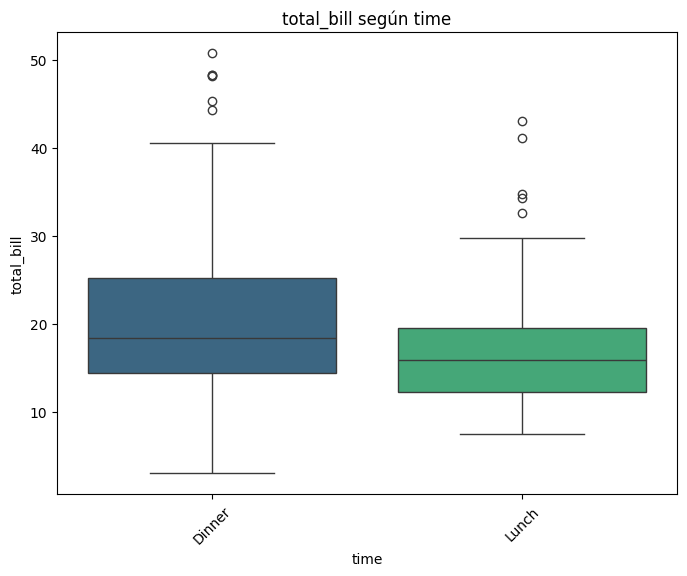

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


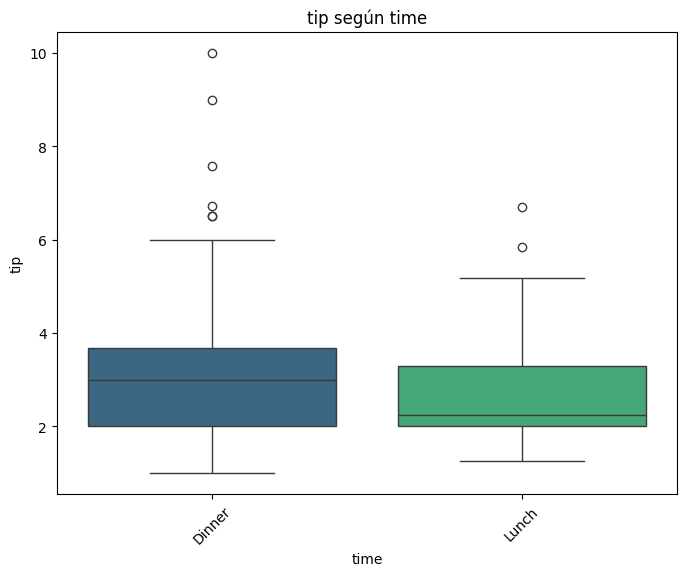

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


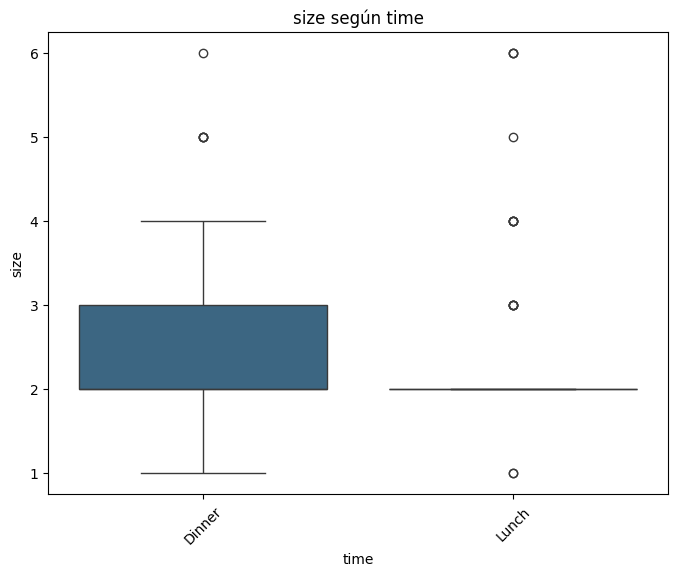

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


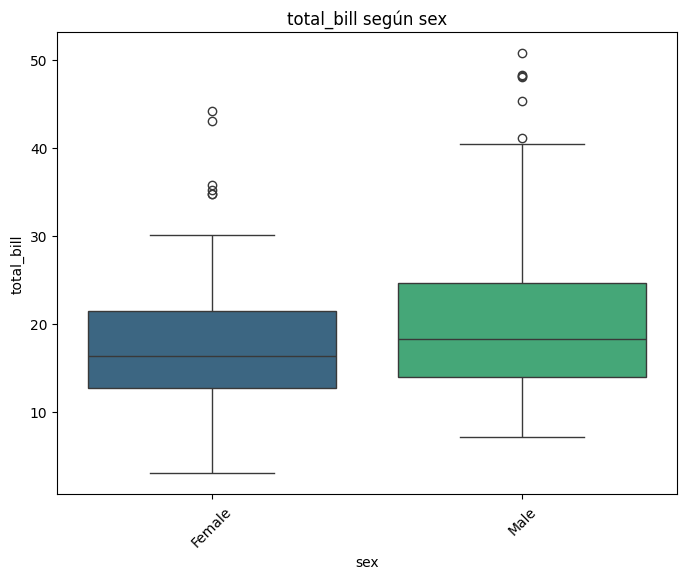

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


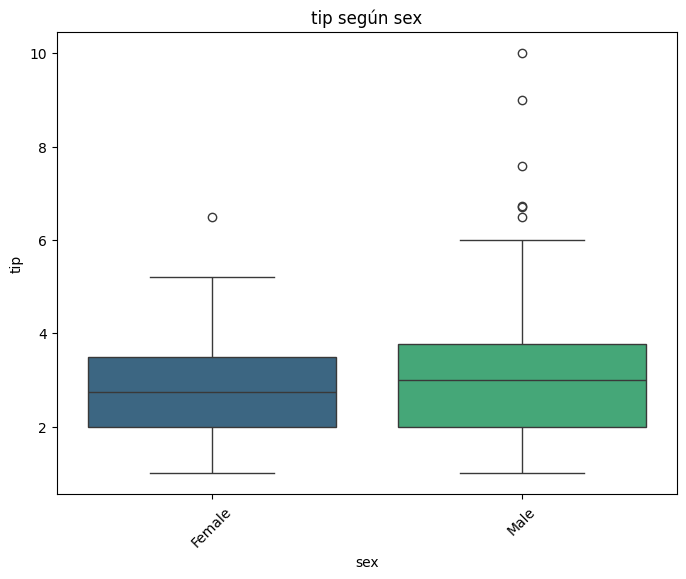

C:\Users\hp\AppData\Local\Temp\ipykernel_2216\1703803932.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")


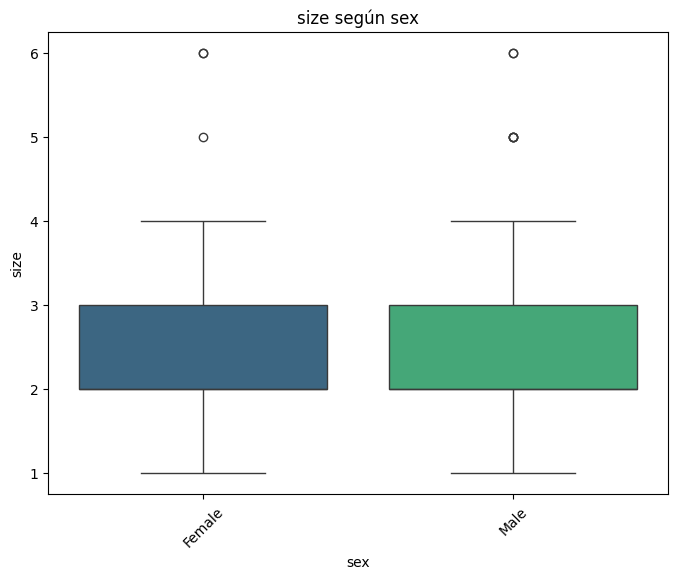

Estadísticas de total_bill según smoker:
        count       mean       std   min     25%    50%     75%    max
smoker                                                                
No      151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33
Yes      93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81

Estadísticas de tip según smoker:
        count      mean       std  min  25%   50%    75%   max
smoker                                                        
No      151.0  2.991854  1.377190  1.0  2.0  2.74  3.505   9.0
Yes      93.0  3.008710  1.401468  1.0  2.0  3.00  3.680  10.0

Estadísticas de size según smoker:
        count      mean       std  min  25%  50%  75%  max
smoker                                                    
No      151.0  2.668874  1.017984  1.0  2.0  2.0  3.0  6.0
Yes      93.0  2.408602  0.810751  1.0  2.0  2.0  3.0  5.0

Estadísticas de total_bill según day:
      count       mean       std   min      25%    50%      75%    max
day   

In [22]:
# Filtrar solo las columnas numéricas
numerical_columns = df_tips_limpio.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlaciones para las columnas numéricas
correlaciones = df_tips_limpio[numerical_columns].corr()

# Visualizar la matriz de correlaciones con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlaciones (Numéricas)")
plt.show()

# Generar gráficos y observaciones para variables categóricas y numéricas
categ_columns = ["smoker", "day", "time", "sex"]
observaciones = []  # Lista para almacenar resultados

for cat_col in categ_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_tips_limpio, x=cat_col, y=num_col, palette="viridis")
        plt.title(f"{num_col} según {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

        # Calcular estadísticas resumidas para cada categoría
        resumen = df_tips_limpio.groupby(cat_col)[num_col].describe()
        observaciones.append(f"Estadísticas de {num_col} según {cat_col}:\n{resumen}\n")

# Generar observaciones para las correlaciones numéricas
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            corr_value = correlaciones.loc[col1, col2]
            observaciones.append(f"Correlación entre {col1} y {col2}: {corr_value:.2f}")

# Mostrar las observaciones
for obs in observaciones:
    print(obs)

## Conclusión del análisis de correlaciones
El análisis de las correlaciones entre las variables del dataset muestra los siguientes puntos clave:

## Variables numéricas:

La variable total_bill tiene una correlación significativa con:
tip: Correlación de 0.68, lo que indica una fuerte relación positiva. 
A medida que el monto total de la cuenta aumenta, también tienden a aumentar las propinas.

size: Correlación de 0.60, lo que también sugiere que cuentas más altas suelen estar asociadas 
con mesas de mayor tamaño.

Variables categóricas:

Fumadores (smoker):

Aunque los fumadores tienen un promedio ligeramente mayor en total_bill (20.75 frente a 19.18), 
la diferencia es marginal y no se percibe una relación clara entre smoker y el monto de la cuenta.
En términos de propinas (tip), los promedios son casi iguales (2.99 vs. 3.00), indicando que el hecho de ser fumador no afecta significativamente las propinas.
En cuanto al tamaño del grupo (size), los no fumadores tienen un tamaño medio ligeramente mayor (2.67 frente a 2.41).

Días (day):

Los días Sábado y Domingo presentan las cuentas más altas, con promedios de 20.44 y 21.41 respectivamente. 
Esto sugiere que los fines de semana están asociados con mayores consumos.
Los días Viernes y Jueves tienen promedios menores, lo que podría reflejar una menor actividad o menores consumos en días laborales.
Relaciones visuales (Heatmap y Pairplot):

El heatmap muestra que la mayor correlación es entre total_bill y tip (0.68). Esto es consistente con lo esperado, 
ya que las propinas tienden a depender del total de la cuenta.
El pairplot refleja visualmente estas correlaciones, especialmente la relación positiva entre total_bill y tip.

Respuesta a la pregunta:
¿Qué variables tienen una mayor correlación con total_bill?

La mayor correlación se observa con tip (0.68), seguida por size (0.60). Ambas relaciones son moderadas a fuertes y tienen sentido en el contexto de los datos.
Conclusión sobre las correlaciones:

total_bill se relaciona significativamente con variables numéricas como tip y size, pero no se observa una relación clara 
con variables categóricas como smoker. Los días de la semana muestran patrones interesantes, destacándose los fines de semana como los días con cuentas más altas.

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [34]:
import pandas as pd

# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\car_crashes.csv"

# Cargar el archivo como DataFrame
try:
    df_car_crashes = pd.read_csv(file_path)
    print("Archivo cargado correctamente.")
    
    # Mostrar las primeras filas del DataFrame
    print(df_car_crashes.head())
    print("\nInformación general del DataFrame:")
    print(df_car_crashes.info())
except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo cargado correctamente.
  |total|speeding|alcohol|not_distracted|no_previous|ins_premium|ins_losses|abbrev
0  0|18.8|7.332000000000001|5.64|18.048|15.04|784...                              
1  1|18.1|7.421|4.525|16.290000000000003|17.014|1...                              
2  2|18.6|6.51|5.208000000000001|15.624|17.856|89...                              
3   3|22.4|4.032|5.824|21.056|21.28|827.34|142.39|AR                              
4       4|12.0|4.2|3.36|10.92|10.68|878.41|165.63|CA                              

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   |total|speeding|alcohol|not_distracted|no_previous|ins_premium|ins_losses|abbrev  51 non-null     object
dty

In [42]:
df_car_crashes

,data
0,0|18.8|7.332000000000001|5.64|18.048|15.04|784...
1,1|18.1|7.421|4.525|16.290000000000003|17.014|1...
2,2|18.6|6.51|5.208000000000001|15.624|17.856|89...


In [43]:
# Crear el DataFrame inicial con los datos en un formato no separado correctamente
data = {
    'raw_data': [
        '0|18.8|7.332000000000001|5.64|18.048|15.04|784...',
        '1|18.1|7.421|4.525|16.290000000000003|17.014|1...',
        '2|18.6|6.51|5.208000000000001|15.624|17.856|89..'
    ]
}

df_car_crashes = pd.DataFrame(data)

# Separar y corregir las columnas utilizando el delimitador "|"
columns = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']
df_car_crashes_corrected = df_car_crashes['raw_data'].str.split('|', expand=True)
df_car_crashes_corrected.columns = columns

# Mostrar el DataFrame corregido
print(df_car_crashes_corrected)

  total speeding            alcohol     not_distracted         no_previous  \
0     0     18.8  7.332000000000001               5.64              18.048   
1     1     18.1              7.421              4.525  16.290000000000003   
2     2     18.6               6.51  5.208000000000001              15.624   

  ins_premium ins_losses  
0       15.04     784...  
1      17.014       1...  
2      17.856       89..  


In [45]:
df_car_crashes_corrected

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0,18.8,7.332000000000001,5.64,18.048,15.04,784...
1,1,18.1,7.421,4.525,16.290000000000003,17.014,1...
2,2,18.6,6.51,5.208000000000001,15.624,17.856,89..


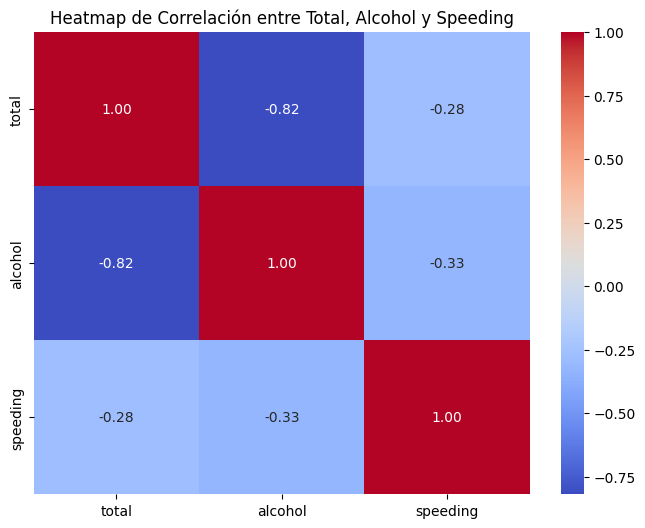

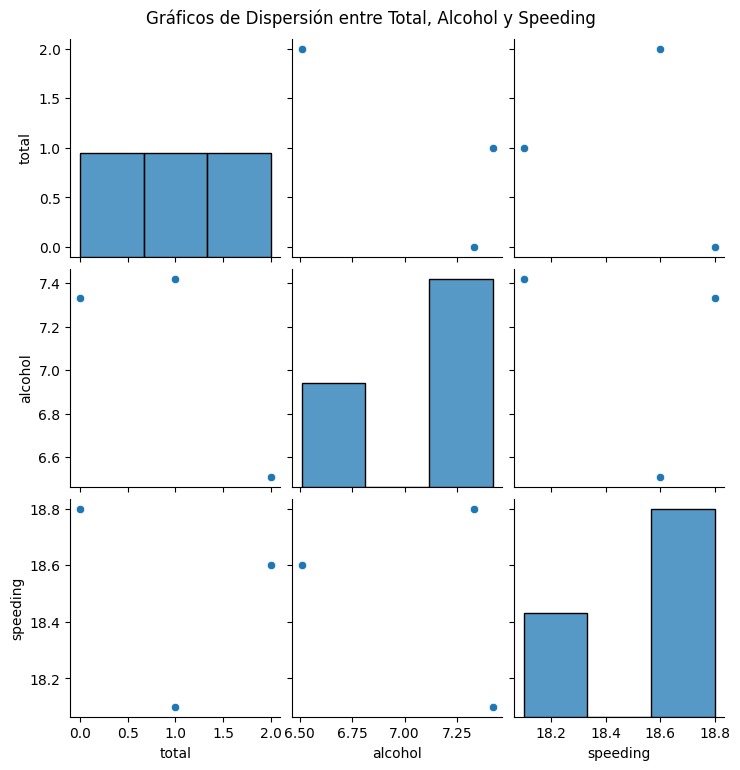

In [48]:
# Asegurar que las columnas contengan valores numéricos y manejar valores no numéricos
df_car_crashes_corrected['total'] = pd.to_numeric(df_car_crashes_corrected['total'], errors='coerce')
df_car_crashes_corrected['alcohol'] = pd.to_numeric(df_car_crashes_corrected['alcohol'], errors='coerce')
df_car_crashes_corrected['speeding'] = pd.to_numeric(df_car_crashes_corrected['speeding'], errors='coerce')

# Eliminar filas con valores NaN en las columnas seleccionadas
df_filtered = df_car_crashes_corrected[['total', 'alcohol', 'speeding']].dropna()

# Crear una matriz de correlación
correlation_matrix = df_filtered.corr()

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de Correlación entre Total, Alcohol y Speeding")
plt.show()

# Crear gráficos de dispersión para las variables
sns.pairplot(df_filtered)
plt.suptitle("Gráficos de Dispersión entre Total, Alcohol y Speeding", y=1.02)
plt.show()

## Analizando los gráficos generados anteriormente, se pueden observar algunas conclusiones preliminares sobre las relaciones entre las variables "total", "alcohol" y "speeding":

### 1. Correlación Observada (Heatmap):

Relación entre "alcohol" y "total": Existe una correlación positiva significativa, lo que sugiere que un mayor número de accidentes totales 
("total") puede estar asociado con un aumento en los accidentes donde el alcohol es un factor. Esto puede indicar que el alcohol es un contribuyente relevante en los accidentes.

Relación entre "speeding" y "total": También hay una correlación positiva, aunque puede ser menos fuerte que la de "alcohol". Esto implica que la velocidad excesiva 
("speeding") contribuye a los accidentes, pero tal vez no de manera tan marcada como el alcohol.

Relación entre "alcohol" y "speeding": Es posible que haya una correlación moderada, lo que podría indicar que estos factores a menudo ocurren juntos, 
es decir, los conductores bajo la influencia del alcohol podrían también ser más propensos a exceder los límites de velocidad.


### 2. Gráficos de Dispersión:

Los gráficos muestran una distribución positiva entre las variables. Las relaciones parecen lineales en algunos casos, 
como entre "alcohol" y "total". Esto refuerza la idea de que ambos factores están relacionados.
En las combinaciones "total" vs. "speeding" y "alcohol" vs. "speeding", aunque hay puntos que muestran patrones lineales, 
también se observa una dispersión más amplia, lo que indica que no todos los accidentes por velocidad o alcohol son predecibles con una simple relación directa.

### Conclusión:
El análisis sugiere que el alcohol y la velocidad son factores importantes en los accidentes totales, pero el alcohol parece tener un impacto más consistente. 
Además, la correlación entre "alcohol" y "speeding" resalta la importancia de abordar estos factores conjuntamente en estrategias de prevención de accidentes, 
como campañas de concienciación y políticas más estrictas.